In [1]:
import os, sys
sys.path.insert(1, '../')
import concentration as conc

import numpy as np
import scipy as sc
import pandas as pd

from importlib import reload
import utils

import matplotlib
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = np.load('results-finite-population-111022.npz')
mu1maici_pxnxtx2 = d['mu1maici_pxnxtx2']
mu1claci_pxnxtx2 = d['mu1claci_pxnxtx2']
mu0maici_pxnxtx2 = d['mu0maici_pxnxtx2']
mu0claci_pxnxtx2 = d['mu0claci_pxnxtx2']
omaici_pxnxtx2 = d['omaici_pxnxtx2']
oclaci_pxnxtx2 = d['oclaci_pxnxtx2']

In [4]:
df = pd.read_csv('finite-population-logistic-results-010622.csv', index_col=0)
df

,ptm,n,estimator,mu1-lower,mu1-upper,mu1-coverage,mu1-width,mu0-lower,mu0-upper,mu0-coverage,mu0-width,o-lower,o-upper,o-coverage,o-width
0,p,200,prediction-powered,0.168358,0.258358,True,0.090,0.056398,0.174398,True,0.118,0.958351,5.828387,True,4.870036
1,p,200,classical,0.078500,0.232500,True,0.154,0.038500,0.192500,True,0.154,0.357344,7.565422,True,7.208078
2,p,200,prediction-powered,0.134358,0.236358,True,0.102,0.092398,0.228398,True,0.136,0.524354,3.040258,True,2.515904
3,p,200,classical,0.090500,0.254500,True,0.164,0.092500,0.279500,True,0.187,0.256506,3.349231,True,3.092724
4,p,200,prediction-powered,0.180358,0.290358,True,0.110,0.066398,0.186398,True,0.120,0.960462,5.753041,True,4.792580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,p_reg,753,classical,0.380500,0.640500,True,0.260,0.114500,0.165500,True,0.051,3.097003,13.778544,True,10.681540
33996,p_reg,753,prediction-powered,0.404135,0.656135,True,0.252,0.145839,0.183839,True,0.038,3.011043,11.175613,True,8.164570
33997,p_reg,753,classical,0.311500,0.639500,True,0.328,0.129500,0.190500,True,0.061,1.922543,11.924338,True,10.001796
33998,p_reg,753,prediction-powered,0.370135,0.564135,True,0.194,0.147839,0.187839,True,0.040,2.540792,7.460427,True,4.919634


Compute true odds ratio and naive point estimates

In [11]:
data_df = pd.read_csv('data/ptm_idr.csv')
ptm_names = ['p', 'ub', 'ac', 'p_reg', 'm', 'sm', 'ac_reg', 'ub_reg', 'sm_reg', 'ga', 'gl', 'm_reg', 'gl_reg']  
for ptm_name in ptm_names:
    n_z1_y1 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['disordered'] == 1)])
    n_z0_y1 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['disordered'] == 1)])
    n_z1_y0 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['ordered'] == 1)])
    n_z0_y0 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['ordered'] == 1)])
    o = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
    print('{}\n  True odds ratio: {:.4f} (N = {})'.format(ptm_name, o, len(data_df.loc[(data_df[ptm_name] == 1)])))
    
    # naive point estimate
    n_z1_y1 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['pred_disordered'] >= 0.5)])
    n_z0_y1 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['pred_disordered'] >= 0.5)])
    n_z1_y0 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['pred_disordered'] < 0.5)])
    n_z0_y0 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['pred_disordered'] < 0.5)])
    o = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
    print('  Naive: {:.4f}'.format(o))

p
  True odds ratio: 2.1309 (N = 6017)
  Naive: 2.7166
ub
  True odds ratio: 0.3951 (N = 3738)
  Naive: 0.2874
ac
  True odds ratio: 0.8933 (N = 1171)
  Naive: 0.8133
p_reg
  True odds ratio: 4.7298 (N = 663)
  Naive: 5.1808
m
  True odds ratio: 0.9299 (N = 442)
  Naive: 0.7516
sm
  True odds ratio: 1.2465 (N = 361)
  Naive: 1.2127
ac_reg
  True odds ratio: 5.2983 (N = 68)
  Naive: 4.5638
ub_reg
  True odds ratio: 4.7015 (N = 66)
  Naive: 4.2542
sm_reg
  True odds ratio: 4.0610 (N = 56)
  Naive: 4.3221
ga
  True odds ratio: 0.3151 (N = 47)
  Naive: 0.6772
gl
  True odds ratio: 10.6815 (N = 23)
  Naive: 8.9306
m_reg
  True odds ratio: 5.5797 (N = 11)
  Naive: 10.0086
gl_reg
  True odds ratio: 9.2842 (N = 3)
  Naive: 11.4066


In [33]:
df.n.unique()

array([  200,   311,   484,   753,  1172,  1825,  2840,  4419,  6877,
       10702])

In [101]:
ptm = 'p'
n = 311
tmp = df.loc[(df.ptm == ptm) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]

# find example
idx = np.where(
    (cl_df['o-width'].to_numpy() > 2 * pp_df['o-width'].to_numpy())
    & (pp_df['o-coverage'].to_numpy())
    & (pp_df['o-lower'].to_numpy() > 1.2)
    & (cl_df['o-lower'].to_numpy() < 0.8)
    & (cl_df['o-upper'].to_numpy() > 1)
)[0]
print(idx.size)
for i in idx:
    print(i)
    print(cl_df.iloc[i])
    print(pp_df.iloc[i])
    print()

1
374
ptm                     p
n                     311
estimator       classical
mu1-lower          0.1275
mu1-upper          0.2565
mu1-coverage         True
mu1-width           0.129
mu0-lower          0.0405
mu0-upper          0.1565
mu0-coverage         True
mu0-width           0.116
o-lower          0.787618
o-upper           8.17328
o-coverage           True
o-width          7.385662
Name: 1749, dtype: object
ptm                              p
n                              311
estimator       prediction-powered
mu1-lower                 0.192358
mu1-upper                 0.268358
mu1-coverage                  True
mu1-width                    0.076
mu0-lower                 0.076398
mu0-upper                 0.142398
mu0-coverage                  True
mu0-width                    0.066
o-lower                   1.434402
o-upper                   4.434201
o-coverage                    True
o-width                   2.999799
Name: 1748, dtype: object



2.130874714081285
2.7166347049898723
[1.434402328379968, 4.434201287597859]
[0.7876177485650465, 8.17327953373683]


/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6


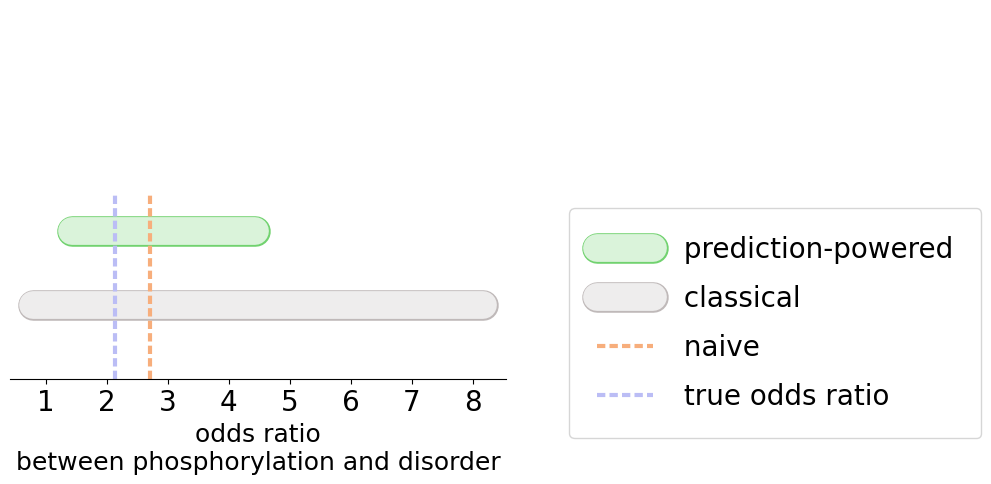

In [111]:
idx = 374
ptm_name = 'p'
save = True

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
print(theta_star)

# naive point estimate
n_z1_y1 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['pred_disordered'] >= 0.5)])
n_z0_y1 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['pred_disordered'] >= 0.5)])
n_z1_y0 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['pred_disordered'] < 0.5)])
n_z0_y0 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['pred_disordered'] < 0.5)])
naive = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
print(naive)

ci_pp = [pp_df.iloc[idx]['o-lower'], pp_df.iloc[idx]['o-upper']]
ci_cl = [cl_df.iloc[idx]['o-lower'], cl_df.iloc[idx]['o-upper']]
print(ci_pp)
print(ci_cl)

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.4,0.4],
    linewidth=20, color="#DAF3DA", solid_capstyle='round',
    path_effects=[pe.Stroke(linewidth=22, foreground="#71D26F"), pe.Normal()],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED", solid_capstyle='round',
    path_effects=[pe.Stroke(linewidth=22, foreground="#BFB9B9"), pe.Normal()],
    label=' classical'
)
plt.plot(
    [naive, naive], [0, 0.5], linestyle='--', dashes=(2, 1), linewidth=3,
    label=' naive', color="#F7AE7C" 
)
plt.plot(
    [theta_star, theta_star], [0, 0.5], linestyle='--', dashes=(2, 1), linewidth=3,
    label=" true odds ratio", color="#bbbdf5"
)
# plt.plot(
#     [1, 1], [0, 0.5], linestyle='-', linewidth=3, c='gray', alpha=0.1 
# )
plt.xlabel("odds ratio\nbetween phosphorylation and disorder", fontsize=18)
plt.yticks([], labels=[])
plt.xticks(range(1, 9), fontsize=20)
plt.ylim([0,1])
leg = plt.legend(fontsize=20, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[1.1,0.5])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)
# plt.gcf().subplots_adjust(right=0.85)

if save:
    plt.savefig('./figures/intervals-longxlabel.pdf', ppi=300, bbox_inches='tight')
plt.show()

2.130874714081285
2.7166347049898723
[1.434402328379968, 4.434201287597859]
[0.7876177485650465, 8.17327953373683]


/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6


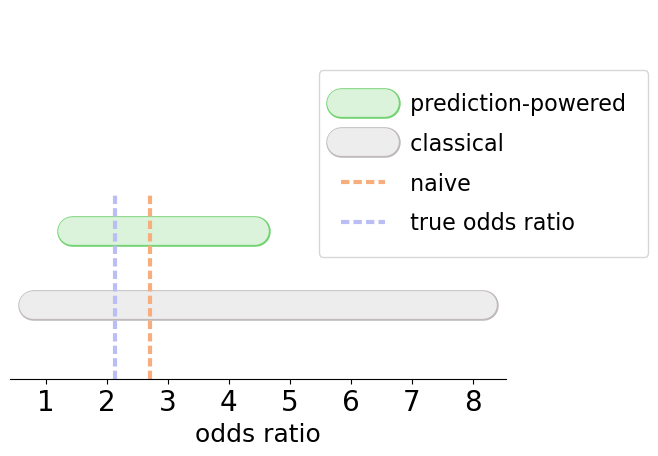

In [137]:
idx = 374
ptm_name = 'p'
save = True

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
print(theta_star)

# naive point estimate
n_z1_y1 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['pred_disordered'] >= 0.5)])
n_z0_y1 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['pred_disordered'] >= 0.5)])
n_z1_y0 = len(data_df.loc[(data_df[ptm_name] == 1) & (data_df['pred_disordered'] < 0.5)])
n_z0_y0 = len(data_df.loc[(data_df[ptm_name] == 0) & (data_df['pred_disordered'] < 0.5)])
naive = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
print(naive)

ci_pp = [pp_df.iloc[idx]['o-lower'], pp_df.iloc[idx]['o-upper']]
ci_cl = [cl_df.iloc[idx]['o-lower'], cl_df.iloc[idx]['o-upper']]
print(ci_pp)
print(ci_cl)

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.4,0.4],
    linewidth=20, color="#DAF3DA", solid_capstyle='round',
    path_effects=[pe.Stroke(linewidth=22, foreground="#71D26F"), pe.Normal()],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED", solid_capstyle='round',
    path_effects=[pe.Stroke(linewidth=22, foreground="#BFB9B9"), pe.Normal()],
    label=' classical'
)
plt.plot(
    [naive, naive], [0, 0.5], linestyle='--', dashes=(2, 1), linewidth=3,
    label=' naive', color="#F7AE7C" 
)
plt.plot(
    [theta_star, theta_star], [0, 0.5], linestyle='--', dashes=(2, 1), linewidth=3,
    label=" true odds ratio", color="#bbbdf5"
)
# plt.plot(
#     [1, 1], [0, 0.5], linestyle='-', linewidth=3, c='gray', alpha=0.1 
# )
plt.xlabel("odds ratio", fontsize=18)
plt.yticks([], labels=[])
plt.xticks(range(1, 9), fontsize=20)
plt.ylim([0,1])
leg = plt.legend(fontsize=16, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[0.6, 0.3])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)
# plt.gcf().subplots_adjust(right=0.85)

if save:
    plt.savefig('./figures/intervals.pdf', ppi=300, bbox_inches='tight')
plt.show()